In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import torch

from torchdiffeq import odeint

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [22]:
y = torch.zeros(2,4)
y[:,0] = 12.6
y[:,1] = 13.0
y[:,2] = 4.8
y[:,3] = 4.9

u = torch.zeros(2,2)
u[:,0] = 3.15
u[:,1] = 3.15

g = [.43, .34]
k = [3.14, 3.29]
K = torch.Tensor([
    [g[0]*k[0], 0],
    [0, g[1]*k[1]],
    [0, (1-g[1])*k[1]],
    [(1-g[0])*k[0], 0],
]).to(y.device)

a = [.071, .057, .071, .057]
g = 981
W = torch.Tensor([
    [-a[0],     0,  a[2],     0],
    [    0, -a[1],     0,  a[3]],
    [    0,     0, -a[2],     0],
    [    0,     0,     0, -a[3]],
]).to(y.device)

A = torch.Tensor([1/28, 1/32, 1/28, 1/32]).unsqueeze(0).to(y.device)
A * (u @ K.T + torch.sqrt(2*g*y) @ W.T)

tensor([[-0.0007,  0.0003, -0.0018,  0.0015],
        [-0.0007,  0.0003, -0.0018,  0.0015]])

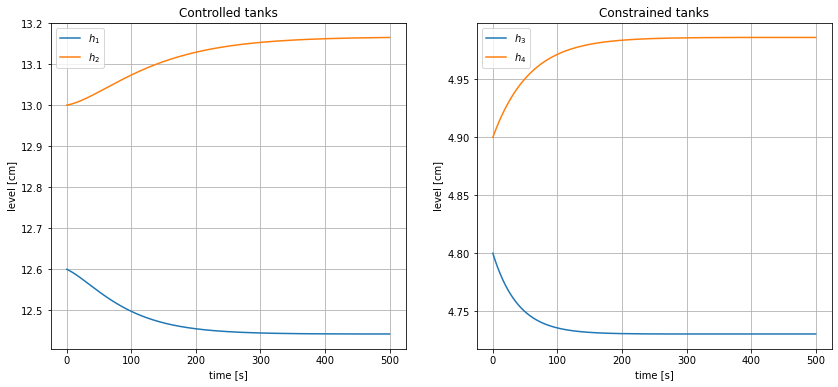

In [19]:
y0 = torch.zeros(1,4)
y0[0,0] = 12.6
y0[0,1] = 13.0
y0[0,2] = 4.8
y0[0,3] = 4.9

u0 = torch.zeros(1,2)
u0[0,0] = 3.15
u0[0,1] = 3.15

dt = .1
N = 5000

def four_tanks(y, u):
    assert y.device == u.device

    g = [.43, .34]
    k = [3.14, 3.29]
    K = torch.Tensor([
        [g[0]*k[0], 0],
        [0, g[1]*k[1]],
        [0, (1-g[1])*k[1]],
        [(1-g[0])*k[0], 0],
    ]).to(y.device)

    a = [.071, .057, .071, .057]
    g = 981
    W = torch.Tensor([
        [-a[0],     0,  a[2],     0],
        [    0, -a[1],     0,  a[3]],
        [    0,     0, -a[2],     0],
        [    0,     0,     0, -a[3]],
    ]).to(y.device)

    A = torch.Tensor([1/28, 1/32, 1/28, 1/32]).unsqueeze(0).to(y.device)
    return A * (u @ K.T + torch.sqrt(2*g*y) @ W.T)

y = odeint(lambda t, y: four_tanks(y,u0), y0, torch.Tensor([i * dt for i in range(N+1)]), method='rk4')

y_ = y.squeeze().detach().numpy()

time = [dt * k for k in range(N+1)]

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

axs[0].set_title('Controlled tanks')
axs[0].plot(time, y_[:,0], label='$h_1$')
axs[0].plot(time, y_[:,1], label='$h_2$')
axs[0].set_ylabel('level [cm]')
axs[0].set_xlabel('time [s]')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Constrained tanks')
axs[1].plot(time, y_[:,2], label='$h_3$')
axs[1].plot(time, y_[:,3], label='$h_4$')
axs[1].set_ylabel('level [cm]')
axs[1].set_xlabel('time [s]')
axs[1].legend()
axs[1].grid()

plt.show()

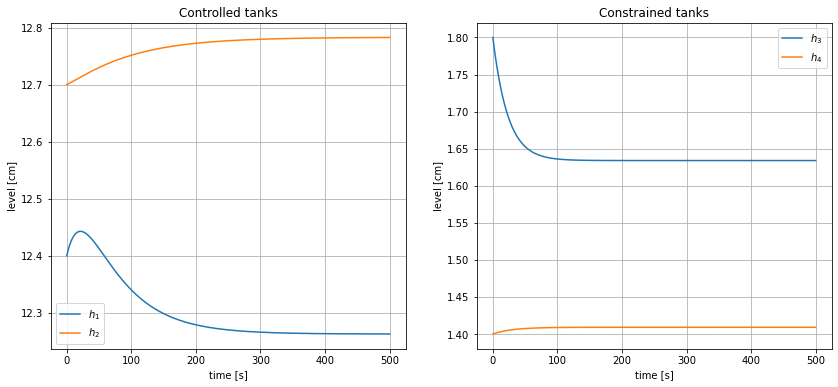

In [20]:
y0 = torch.zeros(1,4)
y0[0,0] = 12.4
y0[0,1] = 12.7
y0[0,2] = 1.8
y0[0,3] = 1.4

u0 = torch.zeros(1,2)
u0[0,0] = 3.0
u0[0,1] = 3.0

dt = 1.
N = 500

def four_tanks(y, u):
    assert y.device == u.device

    g = [.70, .60]
    k = [3.33, 3.35]
    K = torch.Tensor([
        [g[0]*k[0], 0],
        [0, g[1]*k[1]],
        [0, (1-g[1])*k[1]],
        [(1-g[0])*k[0], 0],
    ]).to(y.device)

    a = [.071, .057, .071, .057]
    g = 981
    W = torch.Tensor([
        [-a[0],     0,  a[2],     0],
        [    0, -a[1],     0,  a[3]],
        [    0,     0, -a[2],     0],
        [    0,     0,     0, -a[3]],
    ]).to(y.device)

    A = torch.Tensor([1/28, 1/32, 1/28, 1/32]).unsqueeze(0).to(y.device)
    return A * (u @ K.T + torch.sqrt(2*g*y) @ W.T)

y = odeint(lambda t, y: four_tanks(y,u0), y0, torch.Tensor([i * dt for i in range(N+1)]), method='rk4')

y_ = y.squeeze().detach().numpy()

time = [dt * k for k in range(N+1)]

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

axs[0].set_title('Controlled tanks')
axs[0].plot(time, y_[:,0], label='$h_1$')
axs[0].plot(time, y_[:,1], label='$h_2$')
axs[0].set_ylabel('level [cm]')
axs[0].set_xlabel('time [s]')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Constrained tanks')
axs[1].plot(time, y_[:,2], label='$h_3$')
axs[1].plot(time, y_[:,3], label='$h_4$')
axs[1].set_ylabel('level [cm]')
axs[1].set_xlabel('time [s]')
axs[1].legend()
axs[1].grid()

plt.show()

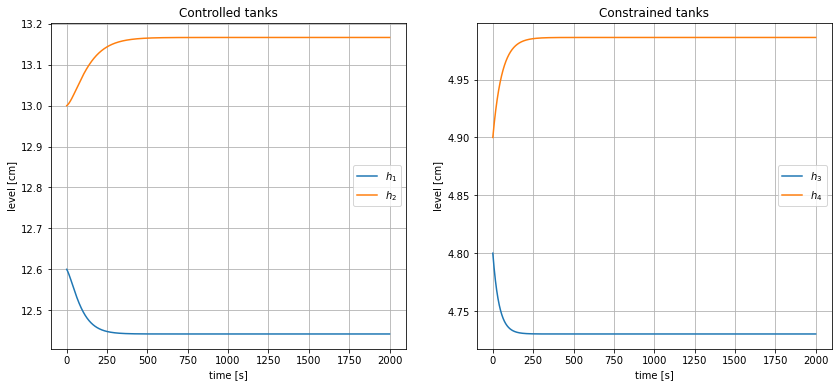

In [21]:
from pideq.four_tanks import four_tanks

y0 = torch.zeros(1,4)
y0[0,0] = 12.6
y0[0,1] = 13.0
y0[0,2] = 4.8
y0[0,3] = 4.9

u0 = torch.zeros(1,2)
u0[0,0] = 3.15
u0[0,1] = 3.15

dt = 1.
N = 2000

y = odeint(lambda t, y: four_tanks(y,u0), y0, torch.Tensor([i * dt for i in range(N+1)]), method='rk4')

y_ = y.squeeze().detach().numpy()

time = [dt * k for k in range(N+1)]

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

axs[0].set_title('Controlled tanks')
axs[0].plot(time, y_[:,0], label='$h_1$')
axs[0].plot(time, y_[:,1], label='$h_2$')
axs[0].set_ylabel('level [cm]')
axs[0].set_xlabel('time [s]')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Constrained tanks')
axs[1].plot(time, y_[:,2], label='$h_3$')
axs[1].plot(time, y_[:,3], label='$h_4$')
axs[1].set_ylabel('level [cm]')
axs[1].set_xlabel('time [s]')
axs[1].legend()
axs[1].grid()

plt.show()